# 4.2 Expectations and Expected Values

The **expected value** (or **expectation**) of a random variable is a weighted average of all possible values, where the weights are the probabilities. It represents the "long-run average" value you'd see if you repeated the experiment many times.

## 4.2.1 Expected Values

### Definition: Expected Value (Discrete)

For a discrete random variable $X$ with PMF $p(x)$:
$$E[X] = \sum_{\text{all } x} x \cdot p(x)$$

### Example: Expected Value of a Die Roll

E[X] = 3.5
Calculation: 1×1/6 + 2×1/6 + 3×1/6 + 4×1/6 + 5×1/6 + 6×1/6 = 3.5


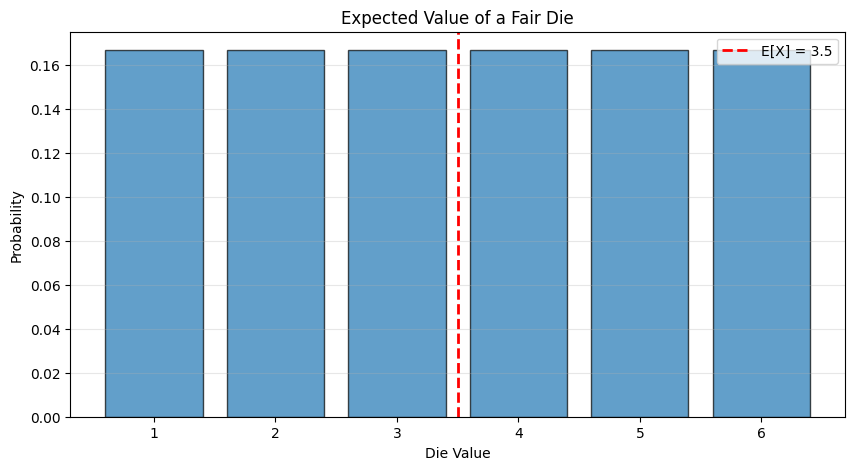

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Die roll: X can be 1, 2, 3, 4, 5, 6, each with probability 1/6
values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

expected_value = np.sum(values * probs)

print(f"E[X] = {expected_value}")
print(f"Calculation: {' + '.join([f'{v}×1/6' for v in values])} = {expected_value}")

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(values, probs, edgecolor='black', alpha=0.7)
plt.axvline(expected_value, color='r', linestyle='--', linewidth=2, 
            label=f'E[X] = {expected_value}')
plt.xlabel('Die Value')
plt.ylabel('Probability')
plt.title('Expected Value of a Fair Die')
plt.legend()
plt.xticks(values)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [2]:
# Sum of two dice
sum_values = range(2, 13)
sum_probs = {
    2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36,
    8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36
}

expected_sum = sum(k * sum_probs[k] for k in sum_values)

print(f"\nE[Sum of two dice] = {expected_sum}")
print(f"E[Die 1] + E[Die 2] = {3.5} + {3.5} = {7.0}")

# Verify by simulation
np.random.seed(42)
die1 = np.random.randint(1, 7, size=100000)
die2 = np.random.randint(1, 7, size=100000)
simulated_mean = np.mean(die1 + die2)

print(f"Simulated mean (100,000 rolls): {simulated_mean:.4f}")


E[Sum of two dice] = 7.0
E[Die 1] + E[Die 2] = 3.5 + 3.5 = 7.0
Simulated mean (100,000 rolls): 7.0023


### Definition: Expected Value (Continuous)

For a continuous random variable $X$ with PDF $p(x)$:
$$E[X] = \int_{-\infty}^{\infty} x \cdot p(x) \, dx$$

### Example: Expected Value of Uniform Distribution

For $X \sim \text{Uniform}[a, b]$:
$$E[X] = \int_a^b x \cdot \frac{1}{b-a} \, dx = \frac{a+b}{2}$$

The expected value is the midpoint of the interval!

In [3]:
from scipy import stats

# Uniform on [2, 8]
a, b = 2, 8
expected_uniform = (a + b) / 2

print(f"\nUniform[{a}, {b}]:")
print(f"E[X] = {expected_uniform}")

# Verify by simulation
simulated_uniform = np.random.uniform(a, b, size=100000)
print(f"Simulated mean: {np.mean(simulated_uniform):.4f}")


Uniform[2, 8]:
E[X] = 5.0
Simulated mean: 5.0025


## Expected Value of a Function

If $Y = g(X)$ for some function $g$:

**Discrete case**:
$$E[g(X)] = \sum_{\text{all } x} g(x) \cdot p(x)$$

**Continuous case**:
$$E[g(X)] = \int_{-\infty}^{\infty} g(x) \cdot p(x) \, dx$$

In [4]:
# Expected value of X^2 for a die roll
values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([1/6] * 6)

expected_x = np.sum(values * probs)
expected_x_squared = np.sum(values**2 * probs)

print(f"\nFor a die roll:")
print(f"E[X] = {expected_x}")
print(f"E[X^2] = {expected_x_squared}")
print(f"(E[X])^2 = {expected_x**2}")
print(f"\nNote: E[X^2] ≠ (E[X])^2")


For a die roll:
E[X] = 3.5
E[X^2] = 15.166666666666666
(E[X])^2 = 12.25

Note: E[X^2] ≠ (E[X])^2


## Properties of Expected Value

### Linearity of Expectation

The most important property:

**For any random variables $X$ and $Y$ (even if dependent)**:
$$E[X + Y] = E[X] + E[Y]$$

**For any constant $a$**:
$$E[aX] = a \cdot E[X]$$

**Combined**:
$$E[aX + bY + c] = a \cdot E[X] + b \cdot E[Y] + c$$

In [5]:
# Demonstration
np.random.seed(42)
X = np.random.randint(1, 7, size=100000)
Y = np.random.randint(1, 7, size=100000)

print("\nLinearity of Expectation:")
print(f"E[X] = {np.mean(X):.4f}")
print(f"E[Y] = {np.mean(Y):.4f}")
print(f"E[X + Y] = {np.mean(X + Y):.4f}")
print(f"E[X] + E[Y] = {np.mean(X) + np.mean(Y):.4f}")
print(f"\nE[3X + 2Y + 5] = {np.mean(3*X + 2*Y + 5):.4f}")
print(f"3E[X] + 2E[Y] + 5 = {3*np.mean(X) + 2*np.mean(Y) + 5:.4f}")


Linearity of Expectation:
E[X] = 3.5031
E[Y] = 3.4992
E[X + Y] = 7.0023
E[X] + E[Y] = 7.0023

E[3X + 2Y + 5] = 22.5077
3E[X] + 2E[Y] + 5 = 22.5077


### Product of Independent Random Variables

If $X$ and $Y$ are **independent**:
$$E[XY] = E[X] \cdot E[Y]$$

**Warning**: This is NOT true in general if $X$ and $Y$ are dependent!

In [6]:
# Independent variables
np.random.seed(42)
X = np.random.randint(1, 7, size=100000)
Y = np.random.randint(1, 7, size=100000)

print("\nProduct of Independent Variables:")
print(f"E[X] = {np.mean(X):.4f}")
print(f"E[Y] = {np.mean(Y):.4f}")
print(f"E[XY] = {np.mean(X*Y):.4f}")
print(f"E[X] × E[Y] = {np.mean(X) * np.mean(Y):.4f}")

# Dependent variables: Y = 7 - X
Y_dependent = 7 - X
print("\nProduct of Dependent Variables (Y = 7 - X):")
print(f"E[X] = {np.mean(X):.4f}")
print(f"E[Y] = {np.mean(Y_dependent):.4f}")
print(f"E[XY] = {np.mean(X*Y_dependent):.4f}")
print(f"E[X] × E[Y] = {np.mean(X) * np.mean(Y_dependent):.4f}")
print(f"\nNote: E[XY] ≠ E[X]E[Y] for dependent variables!")


Product of Independent Variables:
E[X] = 3.5031
E[Y] = 3.4992
E[XY] = 12.2517
E[X] × E[Y] = 12.2579

Product of Dependent Variables (Y = 7 - X):
E[X] = 3.5031
E[Y] = 3.4969
E[XY] = 9.3343
E[X] × E[Y] = 12.2500

Note: E[XY] ≠ E[X]E[Y] for dependent variables!


## 4.2.2 Mean, Variance and Covariance

### Mean

The **mean** of a random variable is just another name for its expected value:
$$\mu_X = E[X]$$

### Variance

The **variance** measures spread:
$$\text{Var}(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2$$

The second form is usually easier to compute.

**Standard deviation**:
$$\sigma_X = \sqrt{\text{Var}(X)}$$

In [7]:
# Variance of a die roll
values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([1/6] * 6)

mean = np.sum(values * probs)
variance_method1 = np.sum((values - mean)**2 * probs)
variance_method2 = np.sum(values**2 * probs) - mean**2
std = np.sqrt(variance_method2)

print("Die Roll Statistics:")
print(f"Mean: {mean:.4f}")
print(f"Variance (method 1): {variance_method1:.4f}")
print(f"Variance (method 2): {variance_method2:.4f}")
print(f"Standard deviation: {std:.4f}")

# Verify by simulation
np.random.seed(42)
simulated = np.random.randint(1, 7, size=100000)
print(f"\nSimulated mean: {np.mean(simulated):.4f}")
print(f"Simulated variance: {np.var(simulated):.4f}")
print(f"Simulated std: {np.std(simulated):.4f}")

Die Roll Statistics:
Mean: 3.5000
Variance (method 1): 2.9167
Variance (method 2): 2.9167
Standard deviation: 1.7078

Simulated mean: 3.5031
Simulated variance: 2.9157
Simulated std: 1.7075


### Properties of Variance

1. **Adding constants doesn't change variance**:
   $$\text{Var}(X + c) = \text{Var}(X)$$

2. **Scaling affects variance by square**:
   $$\text{Var}(aX) = a^2 \cdot \text{Var}(X)$$

3. **For independent variables**:
   $$\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)$$

In [8]:
# Properties of variance
np.random.seed(42)
X = np.random.randint(1, 7, size=100000)

print("\nVariance Properties:")
print(f"Var(X) = {np.var(X):.4f}")
print(f"Var(X + 10) = {np.var(X + 10):.4f}  (same as Var(X))")
print(f"Var(2X) = {np.var(2*X):.4f}")
print(f"4 × Var(X) = {4 * np.var(X):.4f}  (Var(2X) = 2^2 × Var(X))")


Variance Properties:
Var(X) = 2.9157
Var(X + 10) = 2.9157  (same as Var(X))
Var(2X) = 11.6627
4 × Var(X) = 11.6627  (Var(2X) = 2^2 × Var(X))


### Covariance

The **covariance** measures how two variables vary together:
$$\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$$

**Properties**:
- If $X$ and $Y$ are independent: $\text{Cov}(X, Y) = 0$
- $\text{Cov}(X, X) = \text{Var}(X)$
- $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X, Y)$

**Correlation coefficient**:
$$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

This is always between $-1$ and $+1$.


Covariance:
Cov(X, Y_independent) = -0.0086
Cov(X, Y_correlated) = 1.0202
Correlation(X, Y_correlated) = 0.8989


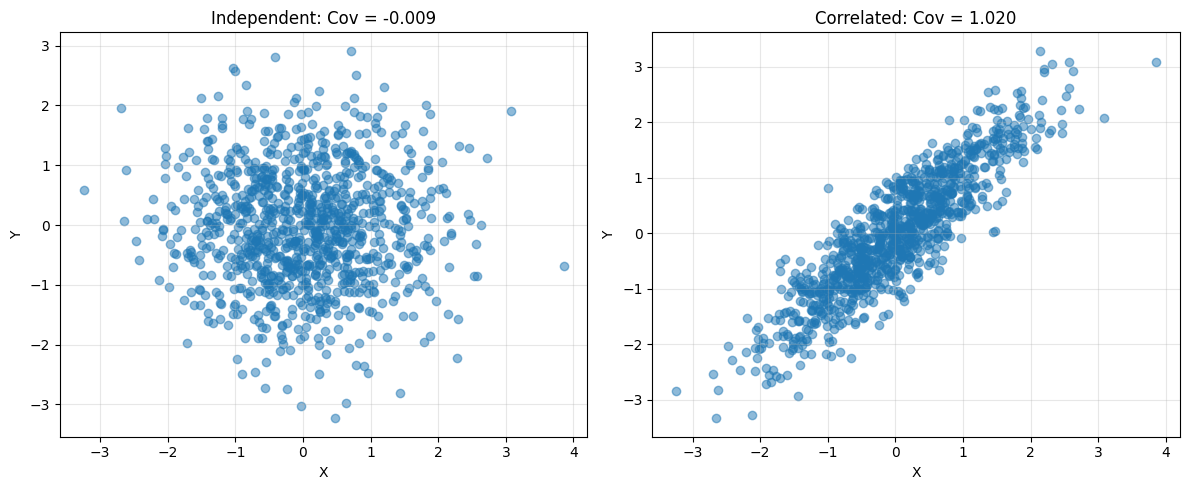

In [9]:
# Covariance example
np.random.seed(42)
X = np.random.randn(10000)
Y_independent = np.random.randn(10000)
Y_correlated = X + 0.5 * np.random.randn(10000)

print("\nCovariance:")
print(f"Cov(X, Y_independent) = {np.cov(X, Y_independent)[0,1]:.4f}")
print(f"Cov(X, Y_correlated) = {np.cov(X, Y_correlated)[0,1]:.4f}")
print(f"Correlation(X, Y_correlated) = {np.corrcoef(X, Y_correlated)[0,1]:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:1000], Y_independent[:1000], alpha=0.5)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title(f'Independent: Cov = {np.cov(X, Y_independent)[0,1]:.3f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X[:1000], Y_correlated[:1000], alpha=0.5)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title(f'Correlated: Cov = {np.cov(X, Y_correlated)[0,1]:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Connection between theory and practice
from scipy import stats

# Theoretical: Exponential distribution with rate λ=2
lambda_rate = 2.0
theoretical_mean = 1 / lambda_rate
theoretical_var = 1 / lambda_rate**2

# Sample from this distribution
np.random.seed(42)
samples = stats.expon.rvs(scale=1/lambda_rate, size=1000)

print("\nExpectation vs. Statistics:")
print(f"Theoretical E[X] = {theoretical_mean:.4f}")
print(f"Sample mean = {np.mean(samples):.4f}")
print(f"\nTheoretical Var(X) = {theoretical_var:.4f}")
print(f"Sample variance = {np.var(samples):.4f}")
print(f"\nAs sample size increases, sample statistics → population parameters")


Expectation vs. Statistics:
Theoretical E[X] = 0.5000
Sample mean = 0.4863

Theoretical Var(X) = 0.2500
Sample variance = 0.2362

As sample size increases, sample statistics → population parameters


## Summary

```{admonition} Key Formulas
:class: important

**Expected Value**:
- Discrete: $E[X] = \sum_x x \cdot p(x)$
- Continuous: $E[X] = \int x \cdot p(x) \, dx$

**Linearity**: $E[aX + bY + c] = aE[X] + bE[Y] + c$

**Variance**: $\text{Var}(X) = E[X^2] - (E[X])^2$

**Properties**:
- $\text{Var}(aX + b) = a^2 \text{Var}(X)$
- $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)$ if independent

**Covariance**: $\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$
```

## Practice Problems

1. A random variable $X$ has values $\{1, 2, 3, 4\}$ with equal probability. Find $E[X]$, $E[X^2]$, and $\text{Var}(X)$.

2. If $E[X] = 5$ and $\text{Var}(X) = 4$, find $E[3X + 2]$ and $\text{Var}(3X + 2)$.

3. For $X \sim \text{Uniform}[0, 1]$, compute $E[X^2]$ and $\text{Var}(X)$.

4. If $X$ and $Y$ are independent with $E[X] = 3$, $E[Y] = 4$, find $E[XY]$ and $E[X^2Y]$.

## Next Section

Now we'll use expectations to prove one of the most important results in probability: the **Weak Law of Large Numbers**.

→ Continue to [4.3 The Weak Law of Large Numbers](ch04_weak_law.md)